Import necessary libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score\
    , recall_score, ConfusionMatrixDisplay, f1_score

Read data from a given file. If you dont have data to train, use the given database "data.cvs"


In [18]:
file_name = input("Hello! Please provide the name of the data file you want the model to use for training:")
df = pd.read_csv(f"{file_name}.csv")
pd.DataFrame(df)


,Age,Years of Experience,Number of Trainings Attended,Department,Education Level,Gender,Previous Year Rating,Length of Service,Number of Projects Handled,Promoted
0,24,12,15,HR,Some College,Female,53,27,86,0
1,53,13,23,IT,Some College,Female,58,30,97,0
2,58,14,14,HR,Some College,Female,71,18,46,0
3,48,7,6,Relations,Master's,Male,98,39,1,0
4,25,28,4,IT,Master's,Female,83,21,97,0
...,...,...,...,...,...,...,...,...,...,...
995,65,25,23,Customer Service,High School,Male,84,34,53,1
996,47,2,16,Relations,Bachelor's,Male,99,24,47,0
997,49,8,6,IT,Bachelor's,Female,53,32,99,0
998,66,21,5,Marketing,PhD,Female,74,4,4,0


Set the target colum and drop unnecessary data that could cause in biases

In [19]:
target = "Promoted"
x = df.drop(columns=[target, "Department", "Gender","Education Level"],axis = 1)
y = df[target]

Convert the data to binary

In [20]:
x = pd.get_dummies(x)


Split the data: testing data and training data

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.60,stratify=y,random_state=42)

Build the model using Decision Tree algorithms


In [22]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

Set up the Predictiction model using test data, if the employee deserve to get promoted

In [23]:
pred = dt.predict(x_test)

Evaluate the model performace


Accuracy Score: 1.00

Precision Score: 1.00

Recall Score: 0.97

F1 Score: 0.98



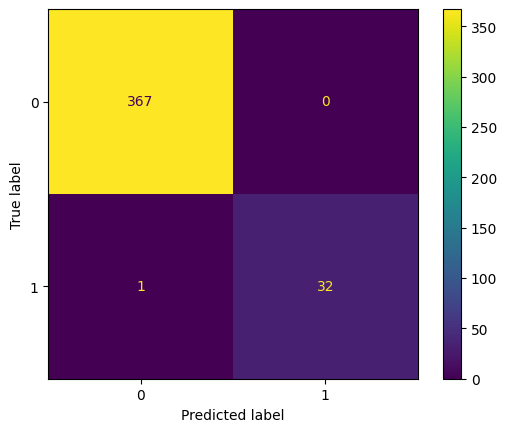

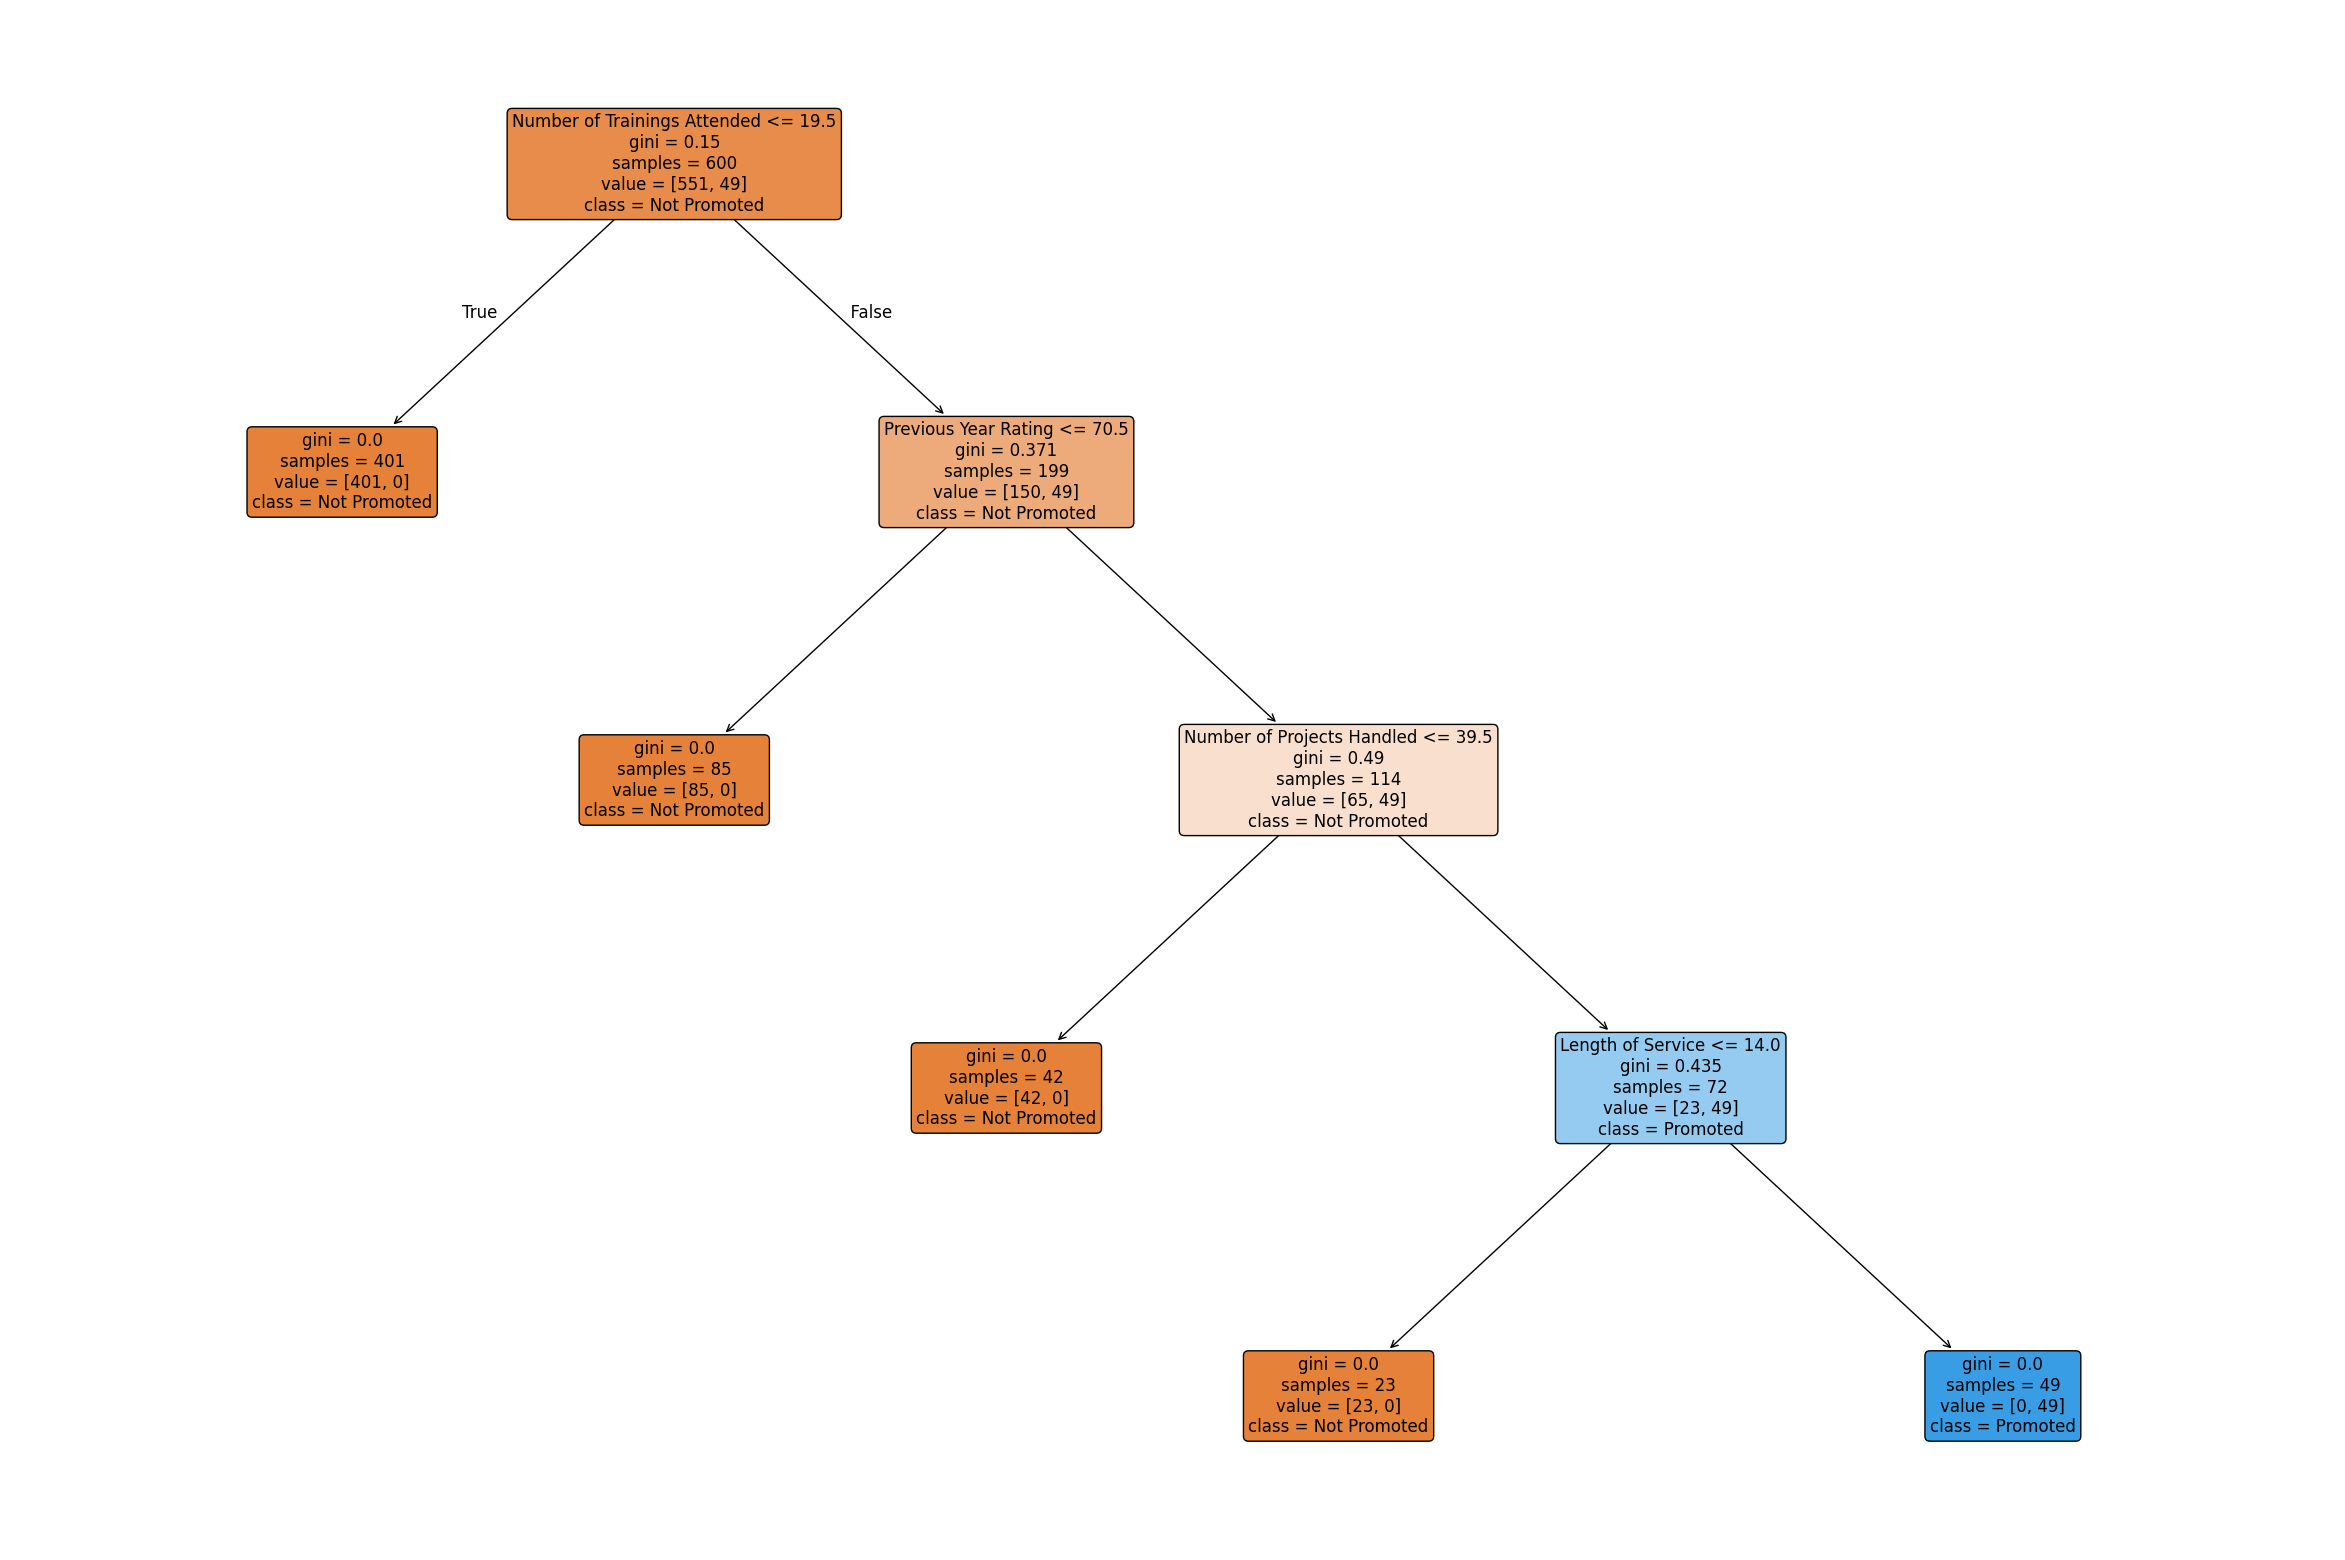

In [24]:


accur_score = accuracy_score(y_test,pred)
prec_score = precision_score(y_test,pred)
rec_score = recall_score(y_test,pred)
f1_sc = f1_score(y_test,pred)
print(f"Accuracy Score: {accur_score:.2f}\n")
print(f"Precision Score: {prec_score:.2f}\n")
print(f"Recall Score: {rec_score:.2f}\n")
print(f"F1 Score: {f1_sc:.2f}\n")

#confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred = pred)
disp = ConfusionMatrixDisplay(cm, display_labels = dt.classes_)
disp.plot()
plt.show()    

# Plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(dt, filled=True,feature_names=x.columns, class_names=['Not Promoted', 'Promoted'], rounded=True, fontsize=12)
plt.show()

Save the model for testing other data

In [25]:
dump(dt,'saved model.joblib') #save the training model and the knoweldge gained for future usage

['saved model.joblib']